<a href="https://colab.research.google.com/github/chandini2595/CMPE255_Assignment3/blob/main/Pycaret_Association_Rule_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 12.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 75.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of selenium to determine which version is compatible with other requirements. Thi

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536527,22809,SET OF 6 T-LIGHTS SANTA,6,12/1/2010 13:04,2.95,12662,Germany
1,536527,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6,12/1/2010 13:04,2.55,12662,Germany
2,536527,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,12,12/1/2010 13:04,0.85,12662,Germany
3,536527,22242,5 HOOK HANGER MAGIC TOADSTOOL,12,12/1/2010 13:04,1.65,12662,Germany
4,536527,22244,3 HOOK HANGER MAGIC GARDEN,12,12/1/2010 13:04,1.95,12662,Germany


  InvoiceNo StockCode                          Description  Quantity  \
0    536527     22809              SET OF 6 T-LIGHTS SANTA         6   
1    536527     84347  ROTATING SILVER ANGELS T-LIGHT HLDR         6   
2    536527     84945   MULTI COLOUR SILVER T-LIGHT HOLDER        12   
3    536527     22242        5 HOOK HANGER MAGIC TOADSTOOL        12   
4    536527     22244           3 HOOK HANGER MAGIC GARDEN        12   

       InvoiceDate  UnitPrice  CustomerID  Country  
0  12/1/2010 13:04       2.95       12662  Germany  
1  12/1/2010 13:04       2.55       12662  Germany  
2  12/1/2010 13:04       0.85       12662  Germany  
3  12/1/2010 13:04       1.65       12662  Germany  
4  12/1/2010 13:04       1.95       12662  Germany  
Frequent Itemsets:
    support                               itemsets
0  0.104478     (PLASTERS IN TIN WOODLAND ANIMALS)
1  0.620232                              (POSTAGE)
2  0.104478             (REGENCY CAKESTAND 3 TIER)
3  0.119403   (ROUND SNACK

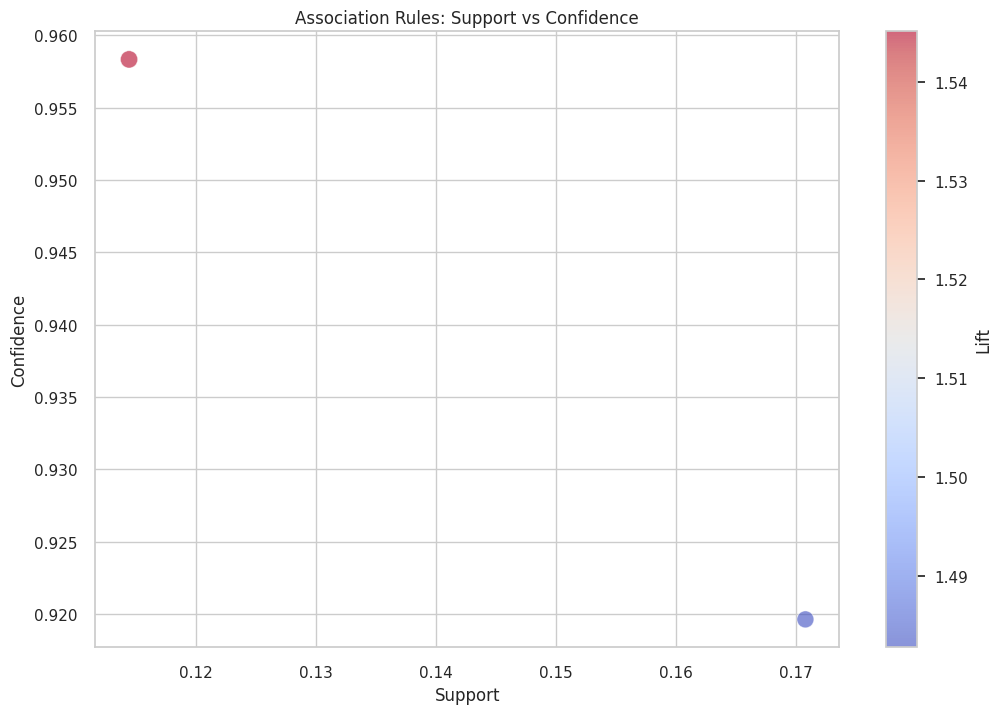

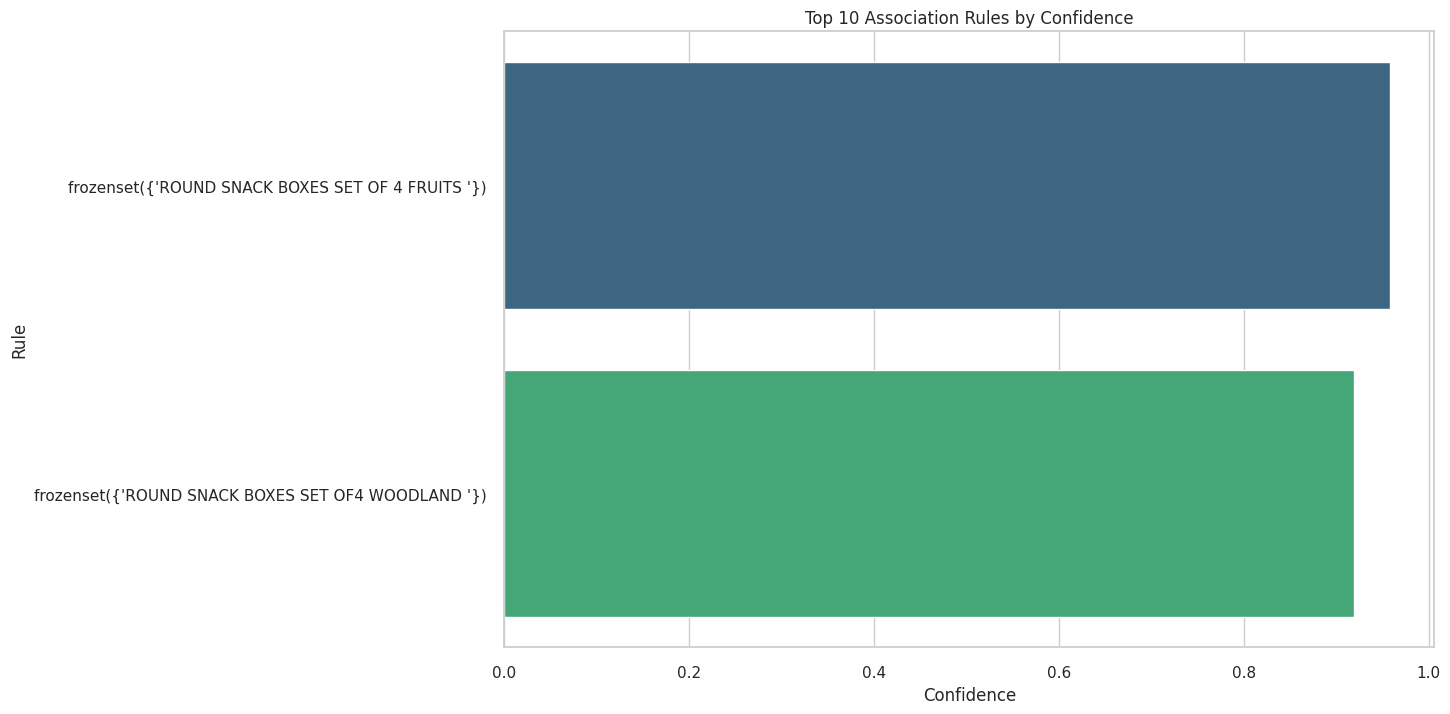

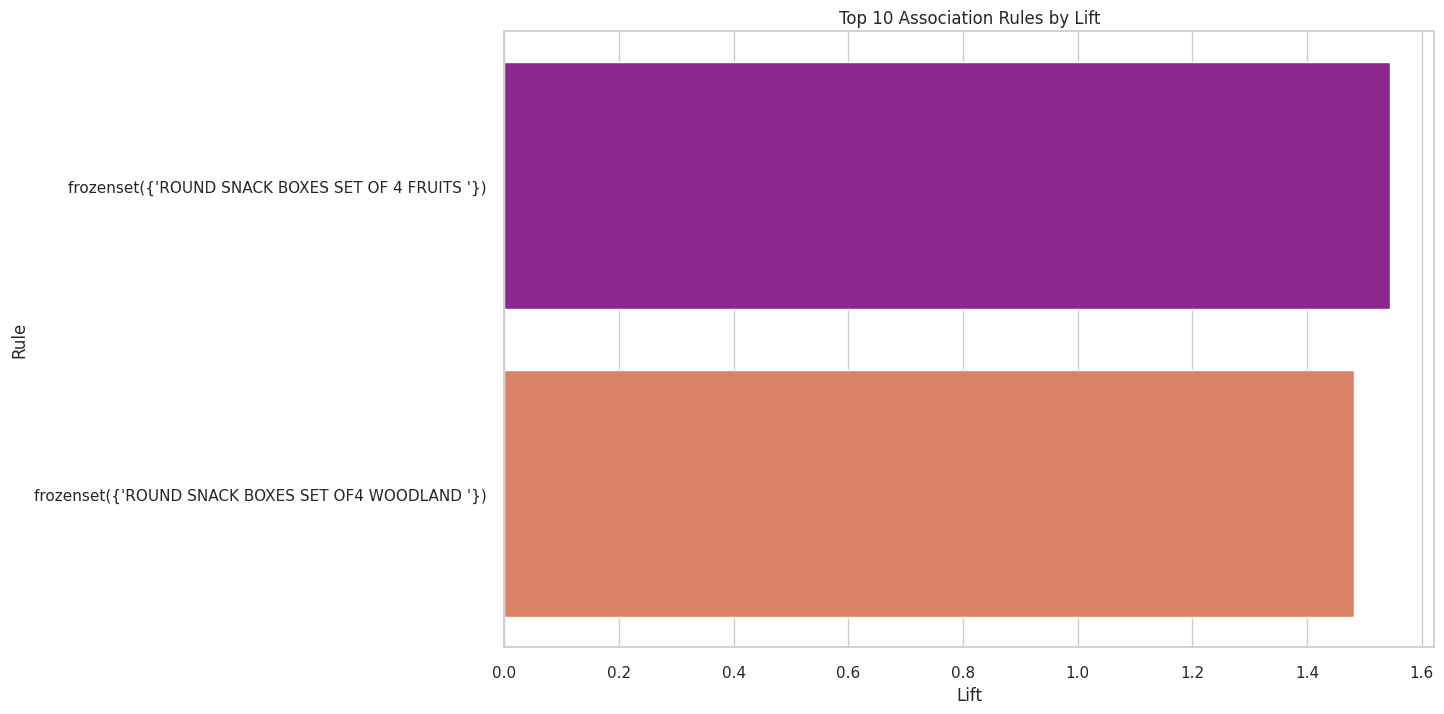

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.datasets import get_data
from mlxtend.frequent_patterns import apriori, association_rules

# Load dataset from PyCaret
dataset = get_data('germany')

# Display the first few rows of the dataset
print(dataset.head())

# Data preprocessing
# Drop rows with missing values if necessary
dataset = dataset.dropna(subset=['InvoiceNo', 'Description'])

# Convert InvoiceNo to string
dataset['InvoiceNo'] = dataset['InvoiceNo'].astype(str)

# Create basket matrix
basket = dataset.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

# Apply Apriori algorithm
frequent_itemsets = apriori(basket, min_support=0.1, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# Display the results
print("Frequent Itemsets:")
print(frequent_itemsets.head())

print("\nAssociation Rules:")
print(rules.head())

# Optional: Save the results to CSV files
frequent_itemsets.to_csv('frequent_itemsets.csv', index=False)
rules.to_csv('association_rules.csv', index=False)

# Set plot style
sns.set(style="whitegrid")

# Scatter plot of rules with support and confidence
plt.figure(figsize=(12, 8))
scatter = plt.scatter(data=rules, x='support', y='confidence', s=rules['lift']*100, c=rules['lift'], cmap='coolwarm', alpha=0.6, edgecolors='w', linewidth=0.5)
plt.title('Association Rules: Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.colorbar(scatter, label='Lift')
plt.show()

# Bar plot of top 10 rules by confidence
top_rules_by_confidence = rules.sort_values(by='confidence', ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(data=top_rules_by_confidence, x='confidence', y='antecedents', palette='viridis')
plt.title('Top 10 Association Rules by Confidence')
plt.xlabel('Confidence')
plt.ylabel('Rule')
plt.show()

# Bar plot of top 10 rules by lift
top_rules_by_lift = rules.sort_values(by='lift', ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(data=top_rules_by_lift, x='lift', y='antecedents', palette='plasma')
plt.title('Top 10 Association Rules by Lift')
plt.xlabel('Lift')
plt.ylabel('Rule')
plt.show()